    year-month  arrivals  departure    total
0   2013-01-01   1757543    1803660  3534816
1   2013-02-01   1673383    1619140  3263834
2   2013-03-01   1779533    1615377  3367747
3   2013-04-01   1563269    1539928  3076025
4   2013-05-01   1577493    1551991  3099298
..         ...       ...        ...      ...
127 2023-08-01   2784436    2638304  5405083
128 2023-09-01   2350900    2478345  4811303
129 2023-10-01   2794395    2558248  5331724
130 2023-11-01   2496368    2566699  5043716
131 2023-12-01   2771118    2818244  5568128

[132 rows x 4 columns]
    year-month  temp  won exchange rate  100 yen exchange rate  \
0   2014-01-01  -0.7        1065.795000            1023.559000   
1   2014-02-01   1.9        1070.970000            1049.333000   
2   2014-03-01   7.9        1070.680000            1046.680000   
3   2014-04-01  14.0        1042.740000            1017.000000   
4   2014-05-01  18.9        1023.989474            1006.212105   
..         ...   ...                ... 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              109.0
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    1.63e-18
Time:                        23:09:50   Log-Likelihood:                         -1961.1
No. Observations:                 120   AIC:                                      3924.
Df Residuals:                     119   BIC:                                      3927.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.732e+05   1.66e+04     10.443      0.000     1.4e+05    2.06e+05
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.546
Skew:                          -0.186   Prob(JB):                        0.280
Kurtosis:                       2.391   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

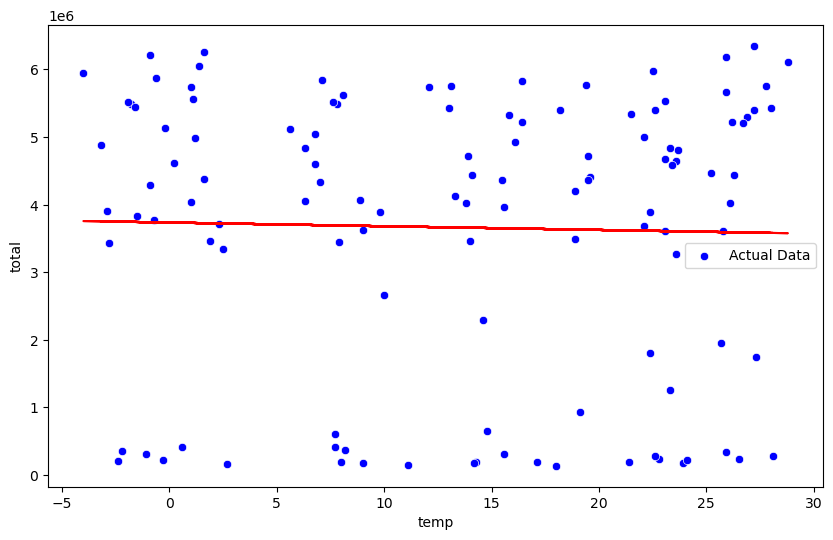

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 첫 번째 엑셀 파일 경로 지정
excel_file = 'C:/Users/emgkrla/Desktop/Data2/y.xlsx'

# 첫 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df1 = pd.read_excel(excel_file)
print(df1)

# 두 번째 엑셀 파일 경로 지정
excel_file1 = 'C:/Users/emgkrla/Desktop/Data2/x.xlsx'

# 두 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df2 = pd.read_excel(excel_file1)
print(df2)

# 데이터 시각화와 분석을 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 두 DataFrame을 'year-month' 열을 기준으로 병합
merged_data = pd.merge(df1, df2, on='year-month')
print(merged_data)

# 독립 변수(X)와 종속 변수(y) 설정
X = merged_data['temp'].values.reshape(-1, 1)  # 'temp'(온도)를 독립 변수로 설정
y = merged_data['total'].values  # 'total'(총합)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['temp'], y=merged_data['total'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['temp'], y_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.477
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              108.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    1.82e-18
Time:                        23:15:53   Log-Likelihood:                         -1879.7
No. Observations:                 120   AIC:                                      3761.
Df Residuals:                     119   BIC:                                      3764.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.767e+04   8411.851     10.422      0.000     7.1e+04    1.04e+05
==============================================================================
Omnibus:                        4.190   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.771
Skew:                          -0.191   Prob(JB):                        0.250
Kurtosis:                       2.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

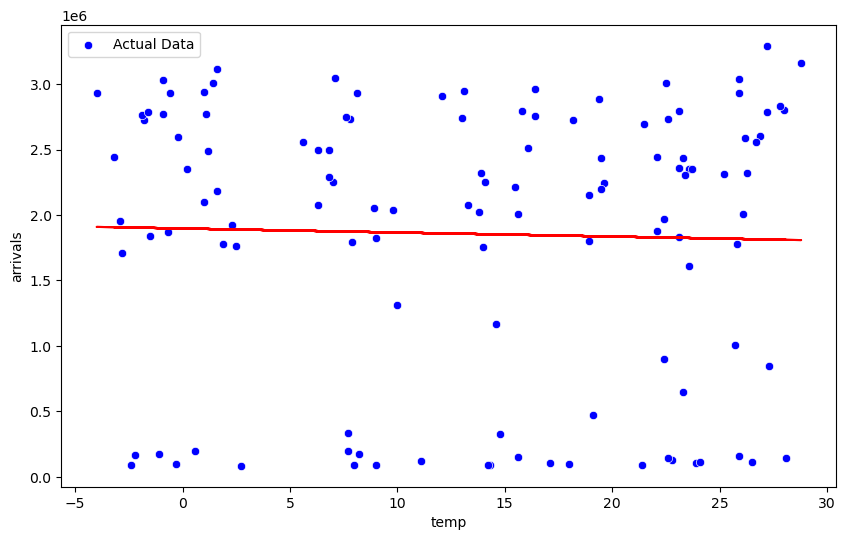

In [6]:
# 독립 변수(X)와 종속 변수(y1) 설정
X = merged_data['temp'].values.reshape(-1, 1)  # 'temp'(온도)를 독립 변수로 설정
y1 = merged_data['arrivals'].values  # 'arrivals'(도착)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y1)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y1_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['temp'], y=merged_data['arrivals'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['temp'], y1_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y1, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              108.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    2.05e-18
Time:                        23:16:45   Log-Likelihood:                         -1878.1
No. Observations:                 120   AIC:                                      3758.
Df Residuals:                     119   BIC:                                      3761.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.638e+04   8305.056     10.401      0.000    6.99e+04    1.03e+05
==============================================================================
Omnibus:                        3.170   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.284
Skew:                          -0.169   Prob(JB):                        0.319
Kurtosis:                       2.415   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

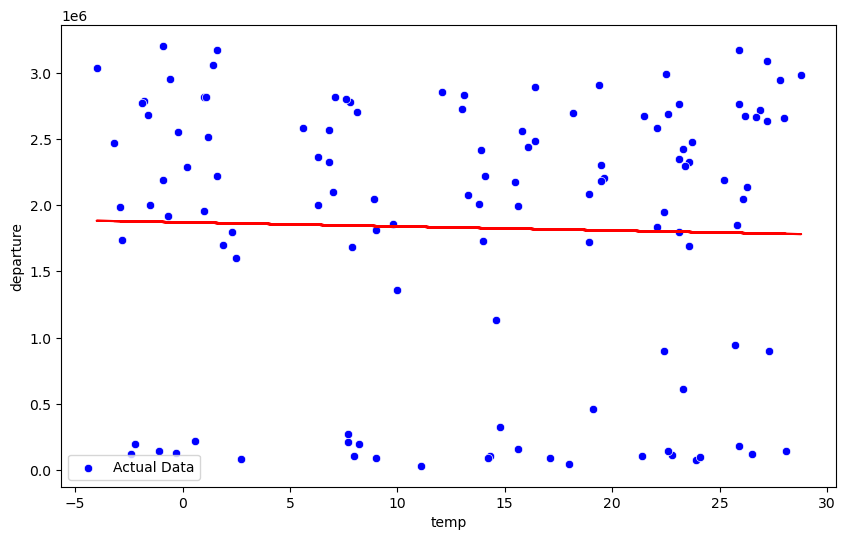

In [7]:
# 독립 변수(X)와 종속 변수(y2) 설정
X = merged_data['temp'].values.reshape(-1, 1)  # 'temp'(온도)를 독립 변수로 설정
y2 = merged_data['departure'].values  # 'departure'(출발)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y2)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y2_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['temp'], y=merged_data['departure'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['temp'], y2_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y2, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()